In [98]:
from diffusion import Diffusion
from data import Data
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy
from model import AE, AE_0
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"); print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cpu


In [112]:
ntot = 4     # number of samples
d = 100      # dimensions
epochs = 400 # training
p = 0.5      # imbalance prob
N = 1000     # generation size
std = 1      # std of initial sample
N_steps=100  # number of discretization steps for ODE
# data
nrm = 1
σ = 1
μ = torch.ones(d)
model_class = AE

In [114]:
α  = lambda t: (1-t) * std
β  = lambda t: t

X_train = Data(ntot,μ,σ,d,p,α,β,device)
X_train.gen_rand()
X_gen   = np.random.randn(N,d) * std

diffusion = Diffusion(α, β, model_class, X_train, copy.deepcopy(X_gen), N_steps, epochs, ntot, d, device)
diffusion.run()


0.0
0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.6

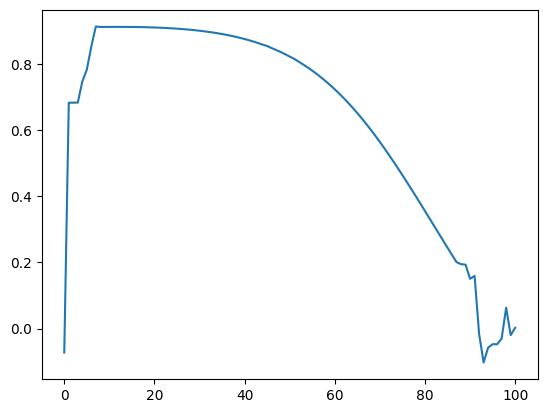

In [111]:
plt.plot(diffusion.summary['Cos w'])
plt.show()

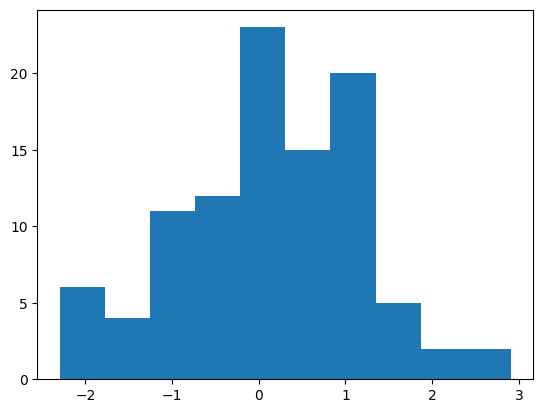

In [102]:
plt.hist(X_gen[0])
plt.show()

In [95]:
X_gen.shape

(1000, 100)